In [80]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import torch
import torchvision
import os

# Data Inspection

In [44]:
with open('labels.json', 'r') as f:
    data_train = json.load(f)
rows_train = []
for id_key, params in data_train.items():
    row = {'id': id_key}
    row.update(params)
    rows_train.append(row)

series_train = pd.DataFrame(rows_train)
series_train.head()

,id,url,name,start,end
0,-220020068_456255414,https://vkvideo.ru/video-220020068_456255414,"Баскетс. 4 сезон, 7 серия",0:01:42,0:01:47
1,-220020068_456249693,https://vkvideo.ru/video-220020068_456249693,"Бывaeт и xyжe. 1 сезон, 14 серия",0:00:06,0:00:10
2,-220020068_456255339,https://vkvideo.ru/video-220020068_456255339,Анатомия скандала. 1 сезон. 2 серия.,0:00:10,0:00:20
3,-220020068_456241755,https://vkvideo.ru/video-220020068_456241755,"Блеск. 2 сезон, 2 серия",0:03:08,0:03:12
4,-220020068_456241671,https://vkvideo.ru/video-220020068_456241671,"Амepикaнcкий вaндaл. 1 сезон, 3 серия",0:03:47,0:03:10


In [45]:
with open('labels_test.json', 'r') as f:
    data_test = json.load(f)
rows_test = []
for id_key, params in data_test.items():
    row = {'id': id_key}
    row.update(params)
    rows_test.append(row)

series_test = pd.DataFrame(rows_test)
series_test.head()

,id,url,name,start,end
0,-220020068_456249220,https://vkvideo.ru/video-220020068_456249220,"24 часа. 2 сезон, 16 серия",0:00:05,0:00:16
1,-220020068_456249373,https://vkvideo.ru/video-220020068_456249373,"24 часа. 8 сезон, 18 серия",0:00:05,0:00:16
2,-220020068_456249231,https://vkvideo.ru/video-220020068_456249231,"24 часа. 3 сезон, 1 серия",0:00:05,0:00:16
3,-220020068_456255339,https://vkvideo.ru/video-220020068_456255339,Анатомия скандала. 1 сезон. 2 серия.,0:00:10,0:00:20
4,-220020068_456249284,https://vkvideo.ru/video-220020068_456249284,"24 часа. 5 сезон, 4 серия",0:00:05,0:00:16


In [46]:
series_train['intro_dur'] = (
    pd.to_timedelta(series_train['end']) - pd.to_timedelta(series_train['start'])
).dt.total_seconds().astype(int)

In [47]:
series_test['intro_dur'] = (
    pd.to_timedelta(series_test['end']) - pd.to_timedelta(series_test['start'])
).dt.total_seconds().astype(int)

In [48]:
series_train['id'] = series_train['id'].str.split('_', n=1).str[1]
series_train

,id,url,name,start,end,intro_dur
0,456255414,https://vkvideo.ru/video-220020068_456255414,"Баскетс. 4 сезон, 7 серия",0:01:42,0:01:47,5
1,456249693,https://vkvideo.ru/video-220020068_456249693,"Бывaeт и xyжe. 1 сезон, 14 серия",0:00:06,0:00:10,4
2,456255339,https://vkvideo.ru/video-220020068_456255339,Анатомия скандала. 1 сезон. 2 серия.,0:00:10,0:00:20,10
3,456241755,https://vkvideo.ru/video-220020068_456241755,"Блеск. 2 сезон, 2 серия",0:03:08,0:03:12,4
4,456241671,https://vkvideo.ru/video-220020068_456241671,"Амepикaнcкий вaндaл. 1 сезон, 3 серия",0:03:47,0:03:10,-37
...,...,...,...,...,...,...
75,456249719,https://vkvideo.ru/video-220020068_456249719,"Бывaeт и xyжe. 2 сезон ,6 серия",0:00:06,0:00:10,4
76,456255400,https://vkvideo.ru/video-220020068_456255400,"Баскетс. 3 сезон, 3 серия",0:00:17,0:00:22,5
77,456256446,https://vkvideo.ru/video-220020068_456256446,"Бойцовская ночь: Афера на миллион. 1 сезон, 4 ...",0:05:41,0:05:25,-16
78,456255401,https://vkvideo.ru/video-220020068_456255401,"Баскетс. 3 сезон, 4 серия",0:00:17,0:00:22,5


In [49]:
series_test['id'] = series_test['id'].str.split('_', n=1).str[1]
series_test

,id,url,name,start,end,intro_dur
0,456249220,https://vkvideo.ru/video-220020068_456249220,"24 часа. 2 сезон, 16 серия",0:00:05,0:00:16,11
1,456249373,https://vkvideo.ru/video-220020068_456249373,"24 часа. 8 сезон, 18 серия",0:00:05,0:00:16,11
2,456249231,https://vkvideo.ru/video-220020068_456249231,"24 часа. 3 сезон, 1 серия",0:00:05,0:00:16,11
3,456255339,https://vkvideo.ru/video-220020068_456255339,Анатомия скандала. 1 сезон. 2 серия.,0:00:10,0:00:20,10
4,456249284,https://vkvideo.ru/video-220020068_456249284,"24 часа. 5 сезон, 4 серия",0:00:05,0:00:16,11
5,456241671,https://vkvideo.ru/video-220020068_456241671,"Амepикaнcкий вaндaл. 1 сезон, 3 серия",0:03:47,0:03:10,-37
6,456249192,https://vkvideo.ru/video-220020068_456249192,"24 часа. 1 сезон, 11 серия",0:00:05,0:00:15,10
7,456249257,https://vkvideo.ru/video-220020068_456249257,"24 часа. 4 сезон, 19 серия",0:00:05,0:00:15,10
8,456249375,https://vkvideo.ru/video-220020068_456249375,"24 часа. 8 сезон, 20 серия",0:00:05,0:00:15,10
9,456256475,https://vkvideo.ru/video-220020068_456256475,"Бойцовская ночь: Афера на миллион. 1 сезон, 5 ...",0:10:42,0:10:25,-17


In [50]:
series_train[['ser_name', 'seas_ser']] = series_train['name'].str.split('.', n=1, expand=True)
series_train['seas_ser'] = series_train['seas_ser'].str.strip()
series_train = series_train.drop(columns=['name'])

In [52]:
series_test[['ser_name', 'seas_ser']] = series_test['name'].str.split('.', n=1, expand=True)
series_test['seas_ser'] = series_test['seas_ser'].str.strip()
series_test = series_test.drop(columns=['name'])

In [53]:
def fix_negative_intro_dur(df):
    mask = df['intro_dur'] < 0
    df.loc[mask, 'intro_dur'] = df.loc[mask, 'intro_dur'].abs()
    df.loc[mask, ['start', 'end']] = df.loc[mask, ['end', 'start']].values
    return df

series_corrected_train = fix_negative_intro_dur(series_train)

In [54]:
series_corrected_train

,id,url,start,end,intro_dur,ser_name,seas_ser
0,456255414,https://vkvideo.ru/video-220020068_456255414,0:01:42,0:01:47,5,Баскетс,"4 сезон, 7 серия"
1,456249693,https://vkvideo.ru/video-220020068_456249693,0:00:06,0:00:10,4,Бывaeт и xyжe,"1 сезон, 14 серия"
2,456255339,https://vkvideo.ru/video-220020068_456255339,0:00:10,0:00:20,10,Анатомия скандала,1 сезон. 2 серия.
3,456241755,https://vkvideo.ru/video-220020068_456241755,0:03:08,0:03:12,4,Блеск,"2 сезон, 2 серия"
4,456241671,https://vkvideo.ru/video-220020068_456241671,0:03:10,0:03:47,37,Амepикaнcкий вaндaл,"1 сезон, 3 серия"
...,...,...,...,...,...,...,...
75,456249719,https://vkvideo.ru/video-220020068_456249719,0:00:06,0:00:10,4,Бывaeт и xyжe,"2 сезон ,6 серия"
76,456255400,https://vkvideo.ru/video-220020068_456255400,0:00:17,0:00:22,5,Баскетс,"3 сезон, 3 серия"
77,456256446,https://vkvideo.ru/video-220020068_456256446,0:05:25,0:05:41,16,Бойцовская ночь: Афера на миллион,"1 сезон, 4 серия"
78,456255401,https://vkvideo.ru/video-220020068_456255401,0:00:17,0:00:22,5,Баскетс,"3 сезон, 4 серия"


In [55]:
series_corrected_test = fix_negative_intro_dur(series_test)

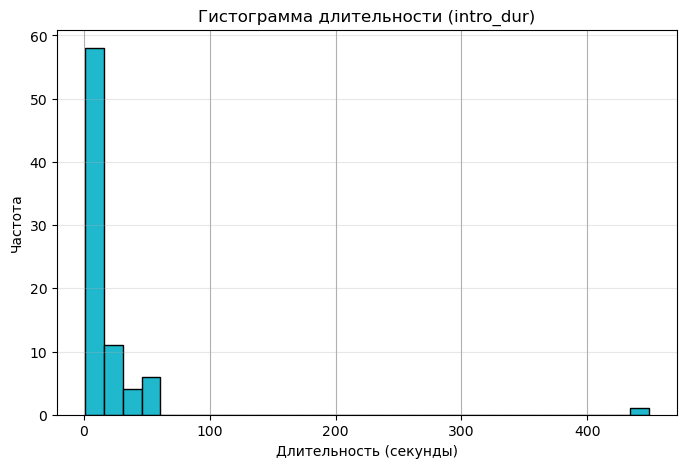

In [56]:
plt.figure(figsize=(8, 5))
series_corrected_train['intro_dur'].hist(bins=30, color='#1FB8CD', edgecolor='black')
plt.xlabel('Длительность (секунды)')
plt.ylabel('Частота')
plt.title('Гистограмма длительности (intro_dur)')
plt.grid(axis='y', alpha=0.3)
plt.show()

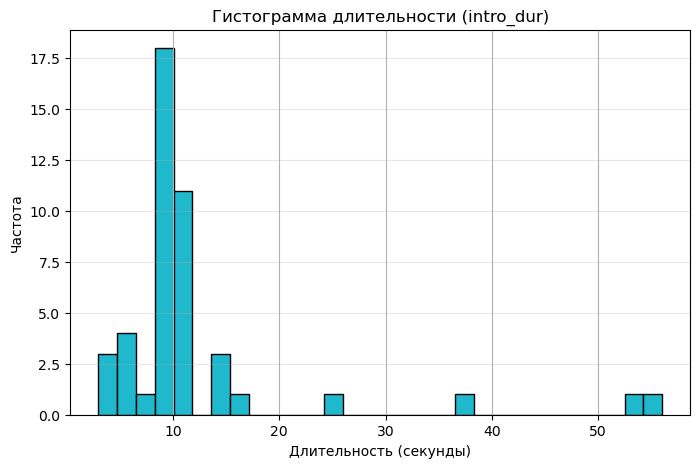

In [63]:
plt.figure(figsize=(8, 5))
series_corrected_test['intro_dur'].hist(bins=30, color='#1FB8CD', edgecolor='black')
plt.xlabel('Длительность (секунды)')
plt.ylabel('Частота')
plt.title('Гистограмма длительности (intro_dur)')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [57]:
idx_max = series_corrected_train['intro_dur'].idxmax()
max_row = series_corrected_train.loc[idx_max]
print(max_row)

id                                              456252055
url          https://vkvideo.ru/video-220020068_456252055
start                                             0:00:11
end                                               0:07:40
intro_dur                                             449
ser_name                                  Блaгиe знaмeния
seas_ser                                 1 сезон, 2 серия
Name: 20, dtype: object


In [58]:
# у меня не особо было время и желание смотреть серию незнакомого сериала, чтобы найти правильные тайминг
# поэтому просто дропнул строку
series_corrected_train = series_corrected_train.drop(idx_max).reset_index(drop=True)


In [59]:
series_corrected_train

,id,url,start,end,intro_dur,ser_name,seas_ser
0,456255414,https://vkvideo.ru/video-220020068_456255414,0:01:42,0:01:47,5,Баскетс,"4 сезон, 7 серия"
1,456249693,https://vkvideo.ru/video-220020068_456249693,0:00:06,0:00:10,4,Бывaeт и xyжe,"1 сезон, 14 серия"
2,456255339,https://vkvideo.ru/video-220020068_456255339,0:00:10,0:00:20,10,Анатомия скандала,1 сезон. 2 серия.
3,456241755,https://vkvideo.ru/video-220020068_456241755,0:03:08,0:03:12,4,Блеск,"2 сезон, 2 серия"
4,456241671,https://vkvideo.ru/video-220020068_456241671,0:03:10,0:03:47,37,Амepикaнcкий вaндaл,"1 сезон, 3 серия"
...,...,...,...,...,...,...,...
74,456249719,https://vkvideo.ru/video-220020068_456249719,0:00:06,0:00:10,4,Бывaeт и xyжe,"2 сезон ,6 серия"
75,456255400,https://vkvideo.ru/video-220020068_456255400,0:00:17,0:00:22,5,Баскетс,"3 сезон, 3 серия"
76,456256446,https://vkvideo.ru/video-220020068_456256446,0:05:25,0:05:41,16,Бойцовская ночь: Афера на миллион,"1 сезон, 4 серия"
77,456255401,https://vkvideo.ru/video-220020068_456255401,0:00:17,0:00:22,5,Баскетс,"3 сезон, 4 серия"


In [61]:
Counter(series_corrected_test['ser_name'])

Counter({'24 часа': 30,
         'Баскетс': 5,
         'Бывaeт и xyжe': 3,
         'Анатомия скандала': 2,
         'Амepикaнcкий вaндaл': 1,
         'Бойцовская ночь: Афера на миллион': 1,
         'Блеск': 1,
         'Архив 81': 1,
         'Белые линии': 1})

In [62]:
Counter(series_corrected_train['ser_name'])

Counter({'Баскетс': 19,
         'Блеск': 10,
         'Бывaeт и xyжe': 9,
         'Бриджертоны': 6,
         'Бодкин': 5,
         'Анатомия скандала': 4,
         'Амepикaнcкий вaндaл': 4,
         'Бойцовская ночь: Афера на миллион': 4,
         'Белые линии': 4,
         'Букмекер': 4,
         'Архив 81': 3,
         'Берлин': 2,
         'Американские Истории Ужасов': 2,
         'Агентство Локвуд и компания': 1,
         'Бeвepли-Xиллз 90210': 1,
         '3вeздный пyть: Пикap': 1})

In [66]:
all_series = pd.concat([series_corrected_train, series_corrected_test])
Counter(all_series['ser_name'])

Counter({'24 часа': 30,
         'Баскетс': 24,
         'Бывaeт и xyжe': 12,
         'Блеск': 11,
         'Анатомия скандала': 6,
         'Бриджертоны': 6,
         'Амepикaнcкий вaндaл': 5,
         'Бойцовская ночь: Афера на миллион': 5,
         'Белые линии': 5,
         'Бодкин': 5,
         'Архив 81': 4,
         'Букмекер': 4,
         'Берлин': 2,
         'Американские Истории Ужасов': 2,
         'Агентство Локвуд и компания': 1,
         'Бeвepли-Xиллз 90210': 1,
         '3вeздный пyть: Пикap': 1})

Тут я решил сделать гибридный подход 80/20, но сериалы с небольшим числом серий отправить в тестовую выборку, критерий поставил <= 3, то есть всё, что ниже Берлин, идет в тест. Так я хочу обеспечить модели умение распознавать короткие заставки в разных стилях (я не смотрю сериалы, поэтому не могу судить о том, насколько похожи эти сериалы), а групповым разбиением я хочу протестировать обобщающую способность модели на новых данных. 

In [69]:
series_counts = all_series['ser_name'].value_counts()
small_series = series_counts[series_counts <= 3].index.tolist()
large_series = series_counts[series_counts > 3].index.tolist()

In [71]:
test = all_series[all_series['ser_name'].isin(small_series)].copy()
train = pd.DataFrame()
test_large = pd.DataFrame()
for s in large_series:
    s_rows = all_series[all_series['ser_name'] == s].sample(frac=1, random_state=42)
    n_train = int(round(len(s_rows) * 0.8))
    train = pd.concat([train, s_rows.iloc[:n_train]])
    test_large = pd.concat([test_large, s_rows.iloc[n_train:]])
test = pd.concat([test, test_large])

In [75]:
Counter(train['ser_name'])

Counter({'24 часа': 24,
         'Баскетс': 19,
         'Бывaeт и xyжe': 10,
         'Блеск': 9,
         'Анатомия скандала': 5,
         'Бриджертоны': 5,
         'Амepикaнcкий вaндaл': 4,
         'Белые линии': 4,
         'Бойцовская ночь: Афера на миллион': 4,
         'Бодкин': 4,
         'Архив 81': 3,
         'Букмекер': 3})

In [74]:
Counter(test['ser_name'])

Counter({'24 часа': 6,
         'Баскетс': 5,
         'Берлин': 2,
         'Американские Истории Ужасов': 2,
         'Бывaeт и xyжe': 2,
         'Блеск': 2,
         'Агентство Локвуд и компания': 1,
         'Бeвepли-Xиллз 90210': 1,
         '3вeздный пyть: Пикap': 1,
         'Анатомия скандала': 1,
         'Бриджертоны': 1,
         'Амepикaнcкий вaндaл': 1,
         'Белые линии': 1,
         'Бойцовская ночь: Афера на миллион': 1,
         'Бодкин': 1,
         'Архив 81': 1,
         'Букмекер': 1})

На этом этапе я смерджил две папки в линуксе (точнее попытался), и обнаружил, что у меня пересекаются некоторые видеофайлы. Поэтому я решил использовать только те, которые получилось смерджить (чтобы не было повторений).

In [78]:
common = pd.merge(train, test, on='id', how='inner')

In [79]:
common

,id,url_x,start_x,end_x,intro_dur_x,ser_name_x,seas_ser_x,url_y,start_y,end_y,intro_dur_y,ser_name_y,seas_ser_y
0,456255389,https://vkvideo.ru/video-220020068_456255389,0:00:00,0:00:08,8,Баскетс,"1 сезон, 9 серия",https://vkvideo.ru/video-220020068_456255389,0:00:00,0:00:08,8,Баскетс,"1 сезон, 9 серия"
1,456255393,https://vkvideo.ru/video-220020068_456255393,0:01:50,0:01:55,5,Баскетс,"2 сезон, 3 серия",https://vkvideo.ru/video-220020068_456255393,0:01:50,0:01:55,5,Баскетс,"2 сезон, 3 серия"
2,456249716,https://vkvideo.ru/video-220020068_456249716,0:00:06,0:00:09,3,Бывaeт и xyжe,"2 сезон, 4 серия",https://vkvideo.ru/video-220020068_456249716,0:00:06,0:00:09,3,Бывaeт и xyжe,"2 сезон, 4 серия"
3,456249692,https://vkvideo.ru/video-220020068_456249692,0:00:06,0:00:10,4,Бывaeт и xyжe,"1 сезон, 13 серия",https://vkvideo.ru/video-220020068_456249692,0:00:06,0:00:10,4,Бывaeт и xyжe,"1 сезон, 13 серия"
4,456255338,https://vkvideo.ru/video-220020068_456255338,0:01:36,0:01:42,6,Анатомия скандала,1 сезон. 1 серия.,https://vkvideo.ru/video-220020068_456255338,0:01:36,0:01:42,6,Анатомия скандала,1 сезон. 1 серия.
5,456257137,https://vkvideo.ru/video-220020068_456257137,0:02:00,0:02:53,53,Белые линии,1 сезон. 8 серия.,https://vkvideo.ru/video-220020068_456257137,0:02:00,0:02:53,53,Белые линии,1 сезон. 8 серия.


In [81]:
dir_path = 'all_data'  
all_dirs = os.listdir(dir_path)

In [82]:
def strip_prefix(name):
    if name.startswith('-220020068_'):
        return name[len('-220020068_'):]
    return name

all_ids = [strip_prefix(name) for name in all_dirs]

In [86]:
train_present = train[train['id'].astype(str).isin(all_ids)]
test_present = test[test['id'].astype(str).isin(all_ids)]

In [89]:
Counter(train_present['ser_name'])

Counter({'24 часа': 24,
         'Баскетс': 19,
         'Бывaeт и xyжe': 10,
         'Блеск': 9,
         'Анатомия скандала': 5,
         'Бриджертоны': 5,
         'Амepикaнcкий вaндaл': 4,
         'Белые линии': 4,
         'Бойцовская ночь: Афера на миллион': 4,
         'Бодкин': 4,
         'Архив 81': 3,
         'Букмекер': 3})

In [90]:
Counter(test_present['ser_name'])

Counter({'24 часа': 6,
         'Баскетс': 5,
         'Берлин': 2,
         'Американские Истории Ужасов': 2,
         'Бывaeт и xyжe': 2,
         'Блеск': 2,
         'Агентство Локвуд и компания': 1,
         'Бeвepли-Xиллз 90210': 1,
         '3вeздный пyть: Пикap': 1,
         'Анатомия скандала': 1,
         'Бриджертоны': 1,
         'Амepикaнcкий вaндaл': 1,
         'Белые линии': 1,
         'Бойцовская ночь: Афера на миллион': 1,
         'Бодкин': 1,
         'Архив 81': 1,
         'Букмекер': 1})

In [91]:
test_ids = test_present['id'].astype(str).tolist()

with open('./test_ids.txt', 'w') as f:
    for id_ in test_ids:
        f.write(f"-220020068_{id_}\n")

На этом этапе я сделал две папки: с обучалками и тестом

# Data Processing

In [130]:
import cv2
import av
from PIL import Image
import numpy as np
from torchvision import transforms
from pathlib import Path
import torch
import open_clip
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

In [102]:
def extract_and_save_frames_pyav(video_path, out_root, fps=1, resize=(224, 224)):
    video_path = Path(video_path)
    video_name = video_path.stem 
    out_dir = Path(out_root) / video_name
    out_dir.mkdir(parents=True, exist_ok=True)

    container = av.open(str(video_path))
    stream = container.streams.video[0]
    stream.thread_type = 'AUTO'
    frames_saved = 0
    pts_set = set()
    for frame in container.decode(stream):
        sec = int(frame.time)
        if sec not in pts_set:
            img = frame.to_ndarray(format='rgb24')
            img = Image.fromarray(img).resize(resize)
            img.save(out_dir / f"frame_{frames_saved:05d}.jpg")
            frames_saved += 1
            pts_set.add(sec)
    print(f"Сохранено {frames_saved} кадров для {video_name}")


In [105]:
video_dir = Path('./train_data')
out_root = Path('./train_frames')

for video_path in video_dir.rglob('*.mp4'):
    try:
        extract_and_save_frames_pyav(video_path, out_root)
    except Exception as e:
        print(f"Ошибка при обработке {video_path}: {e}")

Ошибка при обработке train_data/-220020068_456249259/-220020068_456249259.mp4: [Errno 1094995529] Invalid data found when processing input: 'avcodec_receive_frame()'
Сохранено 2026 кадров для -220020068_456241672
Сохранено 1479 кадров для -220020068_456254537
Сохранено 1224 кадров для -220020068_456249733
Ошибка при обработке train_data/-220020068_456249272/-220020068_456249272.mp4: [Errno 1094995529] Invalid data found when processing input: 'avcodec_receive_frame()'
Сохранено 1303 кадров для -220020068_456249693
Сохранено 1546 кадров для -220020068_456255414
Ошибка при обработке train_data/-220020068_456249211/-220020068_456249211.mp4: [Errno 1094995529] Invalid data found when processing input: 'avcodec_receive_frame()'
Сохранено 1350 кадров для -220020068_456254282
Сохранено 1904 кадров для -220020068_456241849
Сохранено 1566 кадров для -220020068_456255391
Ошибка при обработке train_data/-220020068_456257139/-220020068_456257139.mp4: [Errno 1094995529] Invalid data found when proc

In [107]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms(model_name='ViT-H-14-quickgelu', 
                                                             pretrained='dfn5b',
                                                             device=device)
model.eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-31): 32 x ResidualAttentionBlock(
          (ln_1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1280, out_features=1280, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=1280, out_features=5120, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=5120, out_features=1280, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=Tru

In [111]:
frames_root = Path('train_frames/')
features_root = Path('train_features/')

In [114]:
window_size = 30
batch_size = 128 
def extract_clip_features_batched(frame_paths):
    features_list = []
    for i in range(0, len(frame_paths), batch_size):
        batch_paths = frame_paths[i:i+batch_size]
        images = [preprocess(Image.open(fp)) for fp in batch_paths]
        batch = torch.stack(images).to(device)
        with torch.no_grad(), torch.amp.autocast('cuda'):
            features = model.encode_image(batch)
        features_list.append(features.cpu().numpy())
    return np.vstack(features_list)  

for video_dir in frames_root.iterdir():
    if video_dir.is_dir():
        frame_paths = sorted(video_dir.glob('*.jpg'))
        if len(frame_paths) < window_size:
            continue  
        video_features_dir = features_root / video_dir.name
        video_features_dir.mkdir(exist_ok=True)
        all_features = extract_clip_features_batched(frame_paths)
        for i in range(0, len(all_features) - window_size + 1, 1):
            window_features = all_features[i:i+window_size]
            np.save(video_features_dir / f'window_{i:05d}.npy', window_features)

In [119]:
def time_to_seconds(t):
    parts = list(map(int, t.split(':')))
    if len(parts) == 3:
        return parts[0]*3600 + parts[1]*60 + parts[2]
    elif len(parts) == 2:
        return parts[0]*60 + parts[1]
    else:
        return int(parts[0])

samples = []

for _, row in train_present.iterrows():
    video_id = '-220020068_' + str(row['id'])
    start_sec = time_to_seconds(row['start'])
    end_sec = time_to_seconds(row['end'])
    video_features_dir = features_root / video_id
    window_files = sorted(video_features_dir.glob('window_*.npy'))
    for window_file in window_files:
        window_idx = int(window_file.stem.split('_')[1])
        window_start = window_idx  
        window_end = window_idx + window_size - 1
        label = int(not (window_end < start_sec or window_start > end_sec))
        samples.append((str(window_file), label))


In [122]:
samples[:5]

[('train_features/-220020068_456249219/window_00000.npy', 1),
 ('train_features/-220020068_456249219/window_00001.npy', 1),
 ('train_features/-220020068_456249219/window_00002.npy', 1),
 ('train_features/-220020068_456249219/window_00003.npy', 1),
 ('train_features/-220020068_456249219/window_00004.npy', 1)]

In [125]:
import torch
from torch.utils.data import Dataset, DataLoader

class FeatureDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        feature_path, label = self.samples[idx]
        features = np.load(feature_path) 
        return torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)

train, val = train_test_split(samples, test_size=0.1, random_state=42, stratify=[l for _,l in samples])

train_dataset = FeatureDataset(train)
val_dataset = FeatureDataset(val)


In [127]:
num_workers = 12
batch_size = 128 

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

In [129]:
class ViT(nn.Module):
    def __init__(self, input_dim=1024, num_classes=1, num_layers=4, window_size=30):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=input_dim, nhead=8, dim_feedforward=2048, dropout=0.1, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.classifier = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer(x)
        x = x[:, -1, :]
        return self.classifier(x).squeeze(-1)


In [131]:
model = ViT(input_dim=1024, window_size=window_size).to(device)
optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-4)
criterion = nn.BCEWithLogitsLoss()

scaler = torch.amp.GradScaler('cuda')

for epoch in range(10):
    model.train()
    for features, labels in train_loader:
        features = features.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(features)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
    model.eval()
    val_losses = []
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.to(device)
            labels = labels.to(device)
            with torch.cuda.amp.autocast():
                outputs = model(features)
                loss = criterion(outputs, labels)
            val_losses.append(loss.item())
    print(f"Epoch {epoch+1}, val_loss: {np.mean(val_losses):.4f}")


/tmp/ipykernel_12954/1629879344.py:13: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipykernel_12954/1629879344.py:25: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 1, val_loss: 0.0063
Epoch 2, val_loss: 0.0080
Epoch 3, val_loss: 0.0040
Epoch 4, val_loss: 0.0044
Epoch 5, val_loss: 0.0069
Epoch 6, val_loss: 0.0031
Epoch 7, val_loss: 0.0037
Epoch 8, val_loss: 0.0041
Epoch 9, val_loss: 0.0052
Epoch 10, val_loss: 0.0054


In [134]:
torch.save(model.state_dict(), 'ViT-CLIP_weights.pth')